In [1]:
# Task 1: Exploratory Data Analysis (EDA)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import pandas as pd

# Load the Mushroom dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
df = pd.read_csv(url, header=None)




In [3]:
# Rename the columns
df.columns = ["class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor", "gill-attachment", 
               "gill-spacing", "gill-size", "gill-color", "stalk-shape", "stalk-root", "stalk-surface-above-ring", 
               "stalk-surface-below-ring", "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", 
               "veil-color", "ring-number", "ring-type", "spore-print-color", "population", "habitat"]


In [4]:
print(df.columns)

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


In [5]:
# Convert the class label to numeric
df["class"] = df["class"].map({"e": 0, "p": 1})


In [6]:
# Perform fundamental data exploration
print(df.head())  
print(df.info())   
print(df.describe())  


   class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0      1         x           s         n       t    p               f   
1      0         x           s         y       t    a               f   
2      0         b           s         w       t    l               f   
3      1         x           y         w       t    p               f   
4      0         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1 

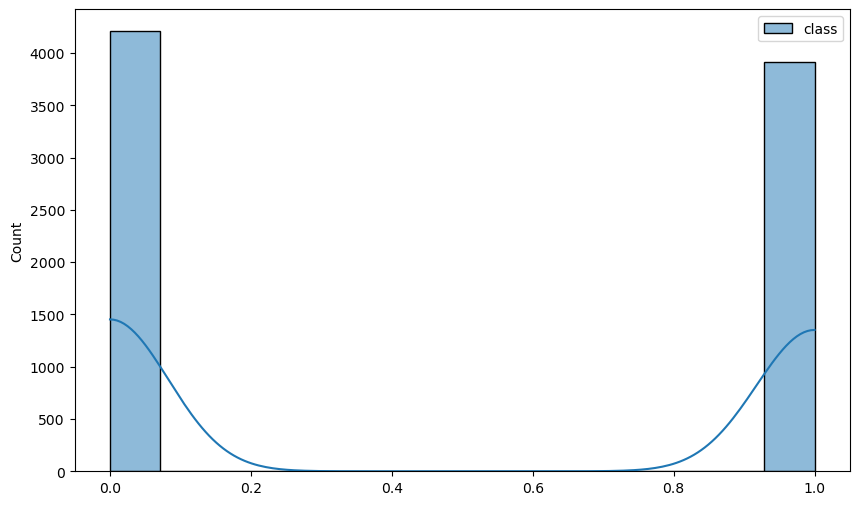

In [7]:

# Visualize feature distributions
plt.figure(figsize=(10, 6))
sns.histplot(df, kde=True)
plt.show()


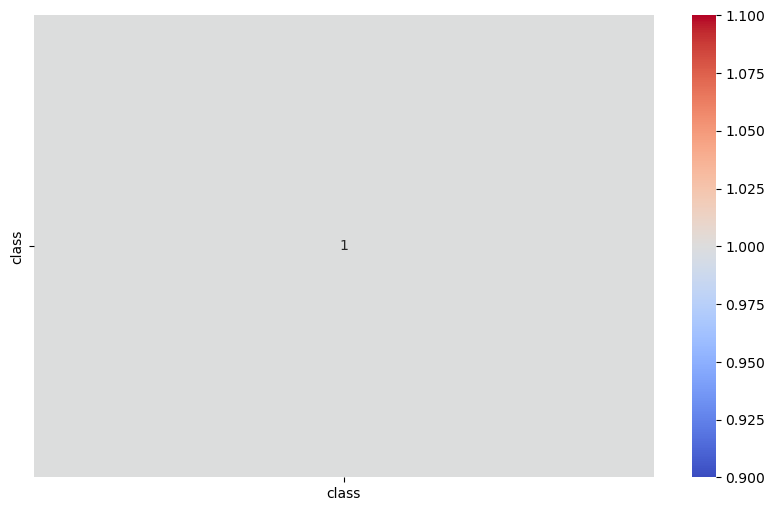

In [8]:
# Investigate feature correlations

df_numeric = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = df_numeric.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [9]:
# Task 2: Data Preprocessing

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

# Display the preprocessed data
print("Preprocessed Data:")
print(df.head())


Preprocessed Data:
   class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0             0          1           4  ...                         2   
1             0          0           4  ...                         2   
2             0          0           5  ...                         2   
3             0          1           5  ...                         2   
4             1          0           4  ...                         2   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-

In [10]:
# Display the preprocessed data
print("Preprocessed Data:")
print(df.head())

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X = df.drop("class", axis=1)
y = df["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the training and testing sets
print("Training Set:")
print(X_train.head())
print(y_train.head())
print("Testing Set:")
print(X_test.head())
print(y_test.head())


Preprocessed Data:
   class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0             0          1           4  ...                         2   
1             0          0           4  ...                         2   
2             0          0           5  ...                         2   
3             0          1           5  ...                         2   
4             1          0           4  ...                         2   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-

In [11]:
3-2

1

In [12]:
print("heool")

heool


<Figure size 1000x600 with 0 Axes>

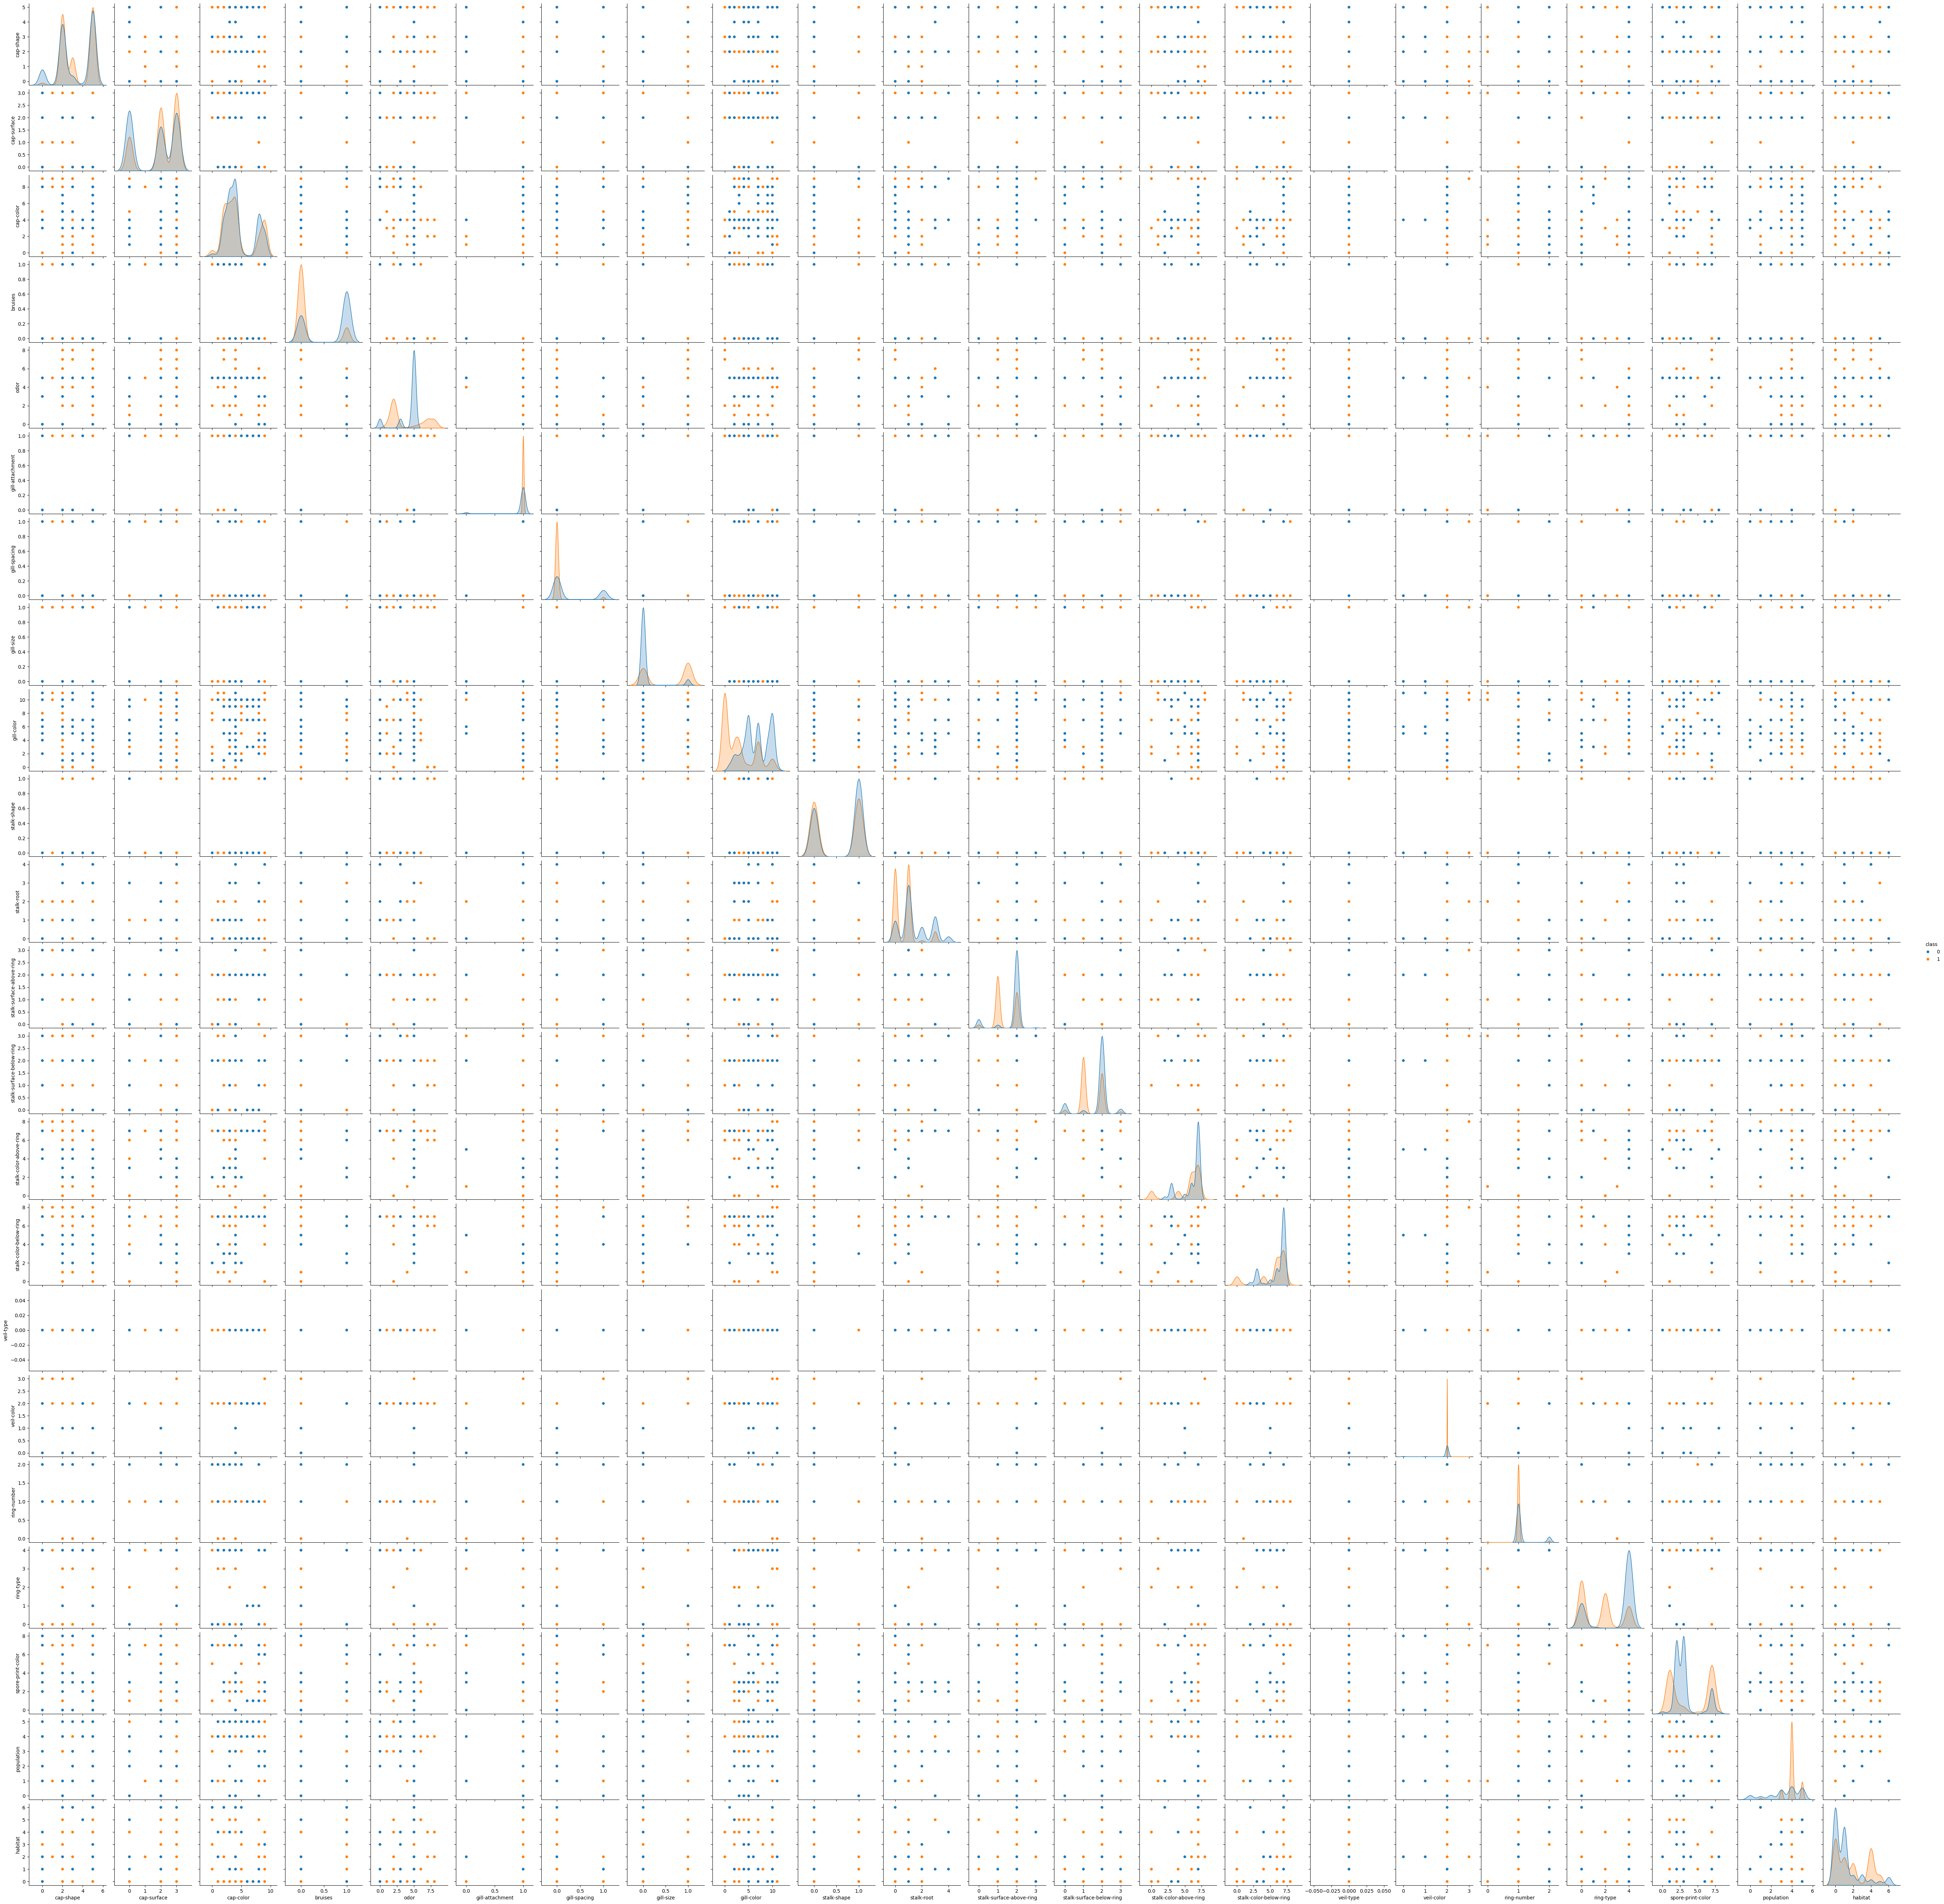

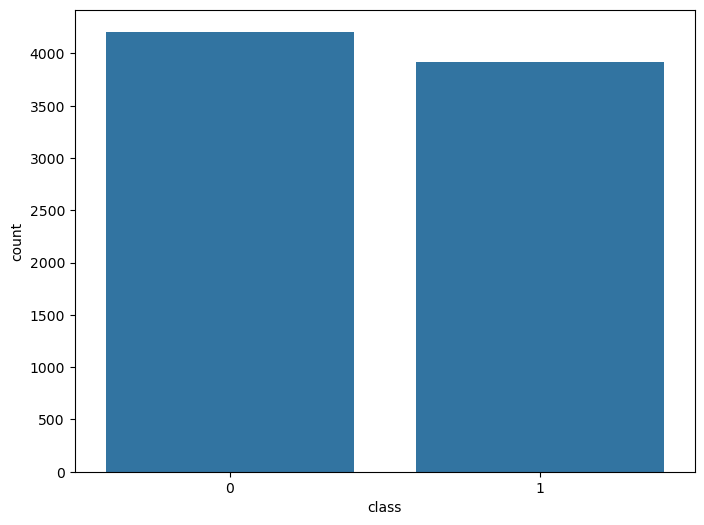

In [13]:
# Task 3: Data Visualization


# Visualize feature distributions and relationships
plt.figure(figsize=(10, 6))
sns.pairplot(df, hue="class")
plt.show()

# Visualize class distributions
plt.figure(figsize=(8, 6))
sns.countplot(x="class", data=df)
plt.show()


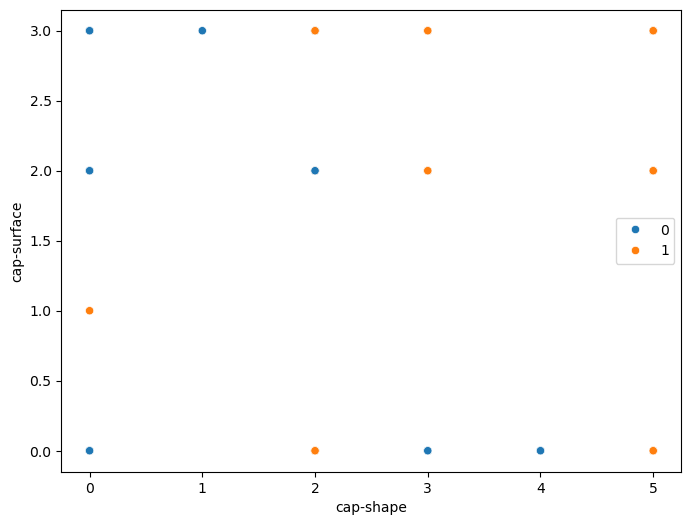

In [18]:
# Task 5: Visualization of SVM Results


# Visualize classification results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test.iloc[:, 0], y=X_test.iloc[:, 1], hue=y_pred)
plt.show()


In [23]:
# Task 6: Parameter Tuning and Optimization


# Experiment with different SVM hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid = {'kernel': ['linear', 'rbf', 'poly'], 'C': [1, 10, 100]}
grid_search = GridSearchCV(svm.SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'C': 10, 'kernel': 'rbf'}
Best Score: 1.0


In [21]:
# Implement a basic SVM classifier
clf = svm.SVC(kernel="linear")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9729230769230769
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       843
           1       0.98      0.96      0.97       782

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625

Confusion Matrix:
[[829  14]
 [ 30 752]]


In [17]:
# Task 4: SVM Implementation


# Implement a basic SVM classifier
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

clf = svm.SVC(kernel="linear")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))




Accuracy: 0.9729230769230769
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       843
           1       0.98      0.96      0.97       782

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625

Confusion Matrix:
[[829  14]
 [ 30 752]]


In [25]:
# Task 6: Parameter Tuning and Optimization


# Experiment with different SVM hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid = {'kernel': ['linear', 'rbf', 'poly'], 'C': [1, 10, 100]}
grid_search = GridSearchCV(svm.SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'C': 10, 'kernel': 'rbf'}
Best Score: 1.0


In [32]:
# Task 7: Comparison and Analysis
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train a SVM classifier
clf_svm = svm.SVC(kernel='linear')
clf_svm.fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_test)

# Train a Random Forest classifier
clf_rf = RandomForestClassifier(n_estimators=100)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)

# Train a Gradient Boosting classifier
clf_gb = GradientBoostingClassifier(n_estimators=100)
clf_gb.fit(X_train, y_train)
y_pred_gb = clf_gb.predict(X_test)

In [33]:
# Compare the performance of different classifiers
classifiers = ['SVM', 'Random Forest', 'Gradient Boosting']
accuracies = [accuracy_score(y_test, y_pred_svm), 
               accuracy_score(y_test, y_pred_rf), 
               accuracy_score(y_test, y_pred_gb)]

print("Comparison of Classifier Performance:")
for classifier, accuracy in zip(classifiers, accuracies):
    print(f"{classifier}: {accuracy:.3f}")


Comparison of Classifier Performance:
SVM: 0.973
Random Forest: 1.000
Gradient Boosting: 1.000


In [34]:
# Analyze the classification reports
print("\nClassification Reports:")
print("SVM:")
print(classification_report(y_test, y_pred_svm))
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))

# Analyze the confusion matrices
print("\nConfusion Matrices:")
print("SVM:")
print(confusion_matrix(y_test, y_pred_svm))
print("Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))
print("Gradient Boosting:")
print(confusion_matrix(y_test, y_pred_gb))



Classification Reports:
SVM:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       843
           1       0.98      0.96      0.97       782

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625

Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Gradient Boosting:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted a